# Face Detection from Videos

In this tutorial, we will use fastdup with a face detection model to detect and crop from videos. Following that we analyze the cropped faces for issues such as duplicates, near-duplicates, outliers, bright/dark/blurry faces.

> This is an advanced functionality of fastdup. Sign up for free to be an beta tester and get early access at info@visual-layer.com .

## Installation & Setting Up

In [1]:
!pip install pip -U
!pip install fastdup

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.4 MB/s eta 0:00:00
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.2 MB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
ERROR: pip's dependency resolver does not currently take into account a

In [2]:
import fastdup
fastdup.__version__

'0.910'

## Downlaod & Extract Dataset

In [3]:
!gdown  --fuzzy https://drive.google.com/file/d/1xuOm5TQ51X1mRpwciDoROPWnMijxpD5m/view

Downloading...
From: https://drive.google.com/uc?id=1xuOm5TQ51X1mRpwciDoROPWnMijxpD5m
To: /media/dnth/Active-Projects/fastdup/examples/data.zip
100%|██████████████████████████████████████| 19.2M/19.2M [00:01<00:00, 11.0MB/s]


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/tiktokdownload.online_1673930249716.mp4  
  inflating: data/tiktokdownload.online_1673930212428.mp4  
  inflating: data/tiktokdownload.online_1673347133497.mp4  
  inflating: data/tiktokdownload.online_1673346841877.mp4  
  inflating: data/tiktokdownload.online_1673930309835.mp4  
  inflating: data/tiktokdownload.online_1673346880144.mp4  
  inflating: data/tiktokdownload.online_1673347087923.mp4  


## Video to Images

fastdup works on images. We must first turn the videos into frames of images.

We can use a one-liner fastdup utility function to turn all the videos in a folder into frames:

In [5]:
fastdup.extract_video_frames(input_dir="data", work_dir="frames")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-29 16:01:15 [INFO] Going to loop over dir data
2023-03-29 16:01:15 [INFO] Found total 7 videos to run on


0

## Run fastdup

Now that we have the frames of images, let's run fastdup and analyze the frames.

In [6]:
fd = fastdup.create(input_dir='frames', work_dir='face_detection_work_dir')

As this is an advance functionality of fastdup, you'd need a license key to use this function, sign up and get your license key for free at info@visual-layer.com .

In [8]:
fd.run(bounding_box='face', license='your_license_key', overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-29 16:01:33 [INFO] Going to loop over dir frames
2023-03-29 16:01:33 [INFO] Found total 21 images to run on
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes 0 Features
2023-03-29 16:01:34 [INFO] Going to loop over dir /tmp/crops_input.csv
2023-03-29 16:01:34 [INFO] Found total 22 images to run on
2023-03-29 16:01:35 [INFO] Found total 22 images to run onEstimated: 0 Minutes 0 Features
Finished histogram 0.023
Finished bucket sort 0.029
2023-03-29 16:01:35 [INFO] 3) Finished write_index() NN model
2023-03-29 16:01:35 [INFO] Stored nn model index file face_detection_work_dir/nnf.index
2023-03-29 16:01:35 [INFO] Total time took 1007 ms
2023-03-29 16:01:35 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-03-29 16:01:35 [INFO] Found a total of 2 nearly identical images(d>0.980), which are 3.03 %
2023-03-29 16:01:35 [INFO] Found a total of 10 above

## Components Gallery

We can visualize the cluster of similar detections using the components gallery view. Specify `draw_bbox=True` to see the detection bounding box on the original image.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.08it/s]

Finished OK. Components are stored as image files face_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  face_detection_work_dir/galleries/components.html
Execution time in seconds 0.1



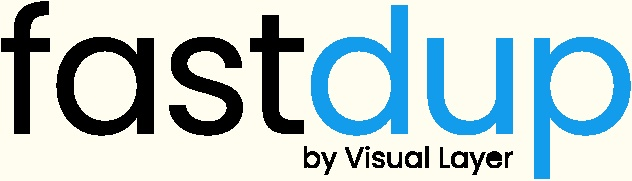
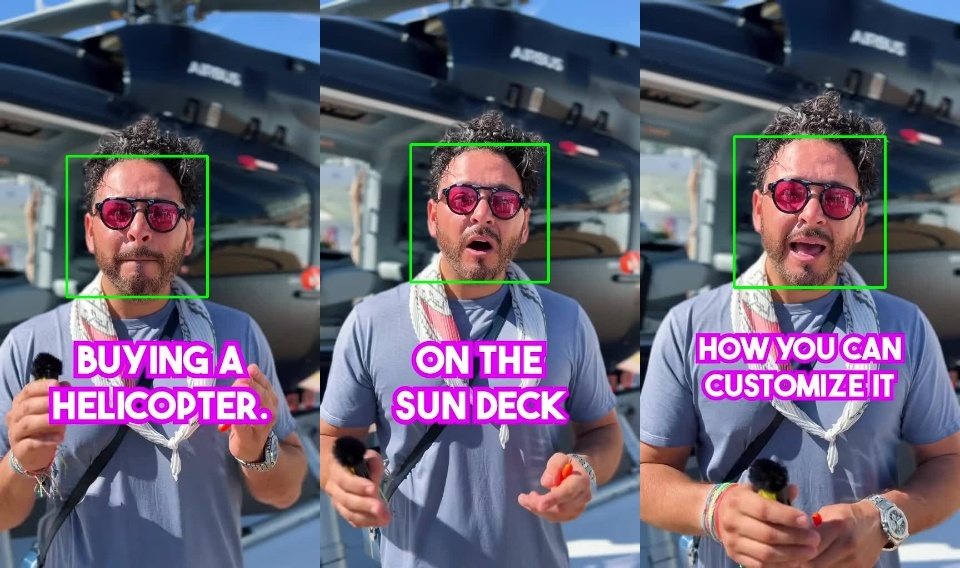

In [9]:
fd.vis.component_gallery(draw_bbox=True)

If you'd like to view just the cropped bounding box images, specify `draw_bbox=False`

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.34it/s]

Finished OK. Components are stored as image files face_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  face_detection_work_dir/galleries/components.html
Execution time in seconds 0.0



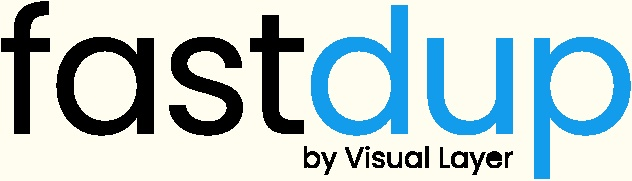
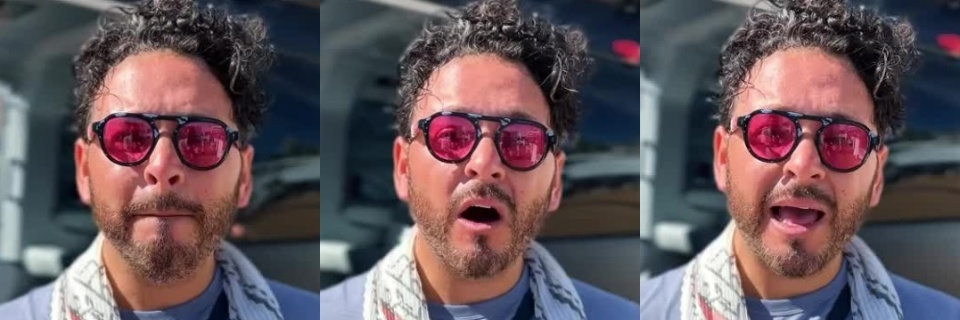

In [10]:
fd.vis.component_gallery(draw_bbox=False)

## Find Similar Faces Across Videos

Using the `similarity_gallery` view, we can find similar looking faces (bounding boxes) across all the extracted frames.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 102.27it/s]

Stored similar images visual view in  face_detection_work_dir/galleries/similarity.html



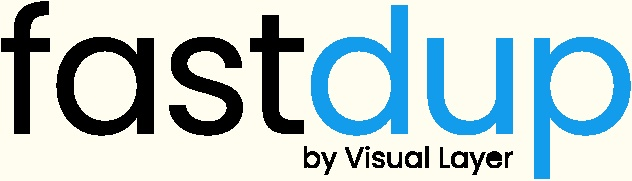
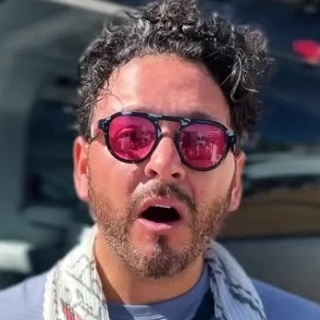
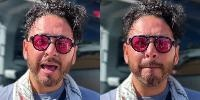
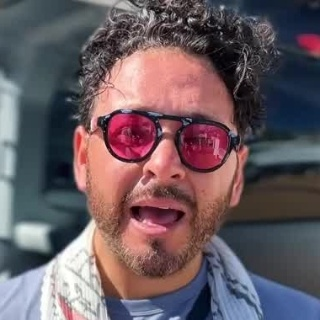
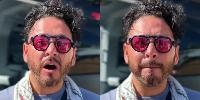
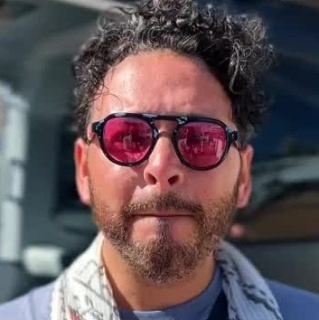
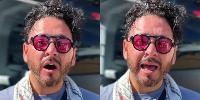
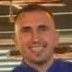
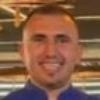
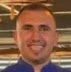
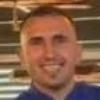
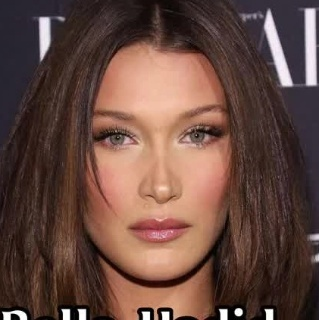
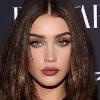
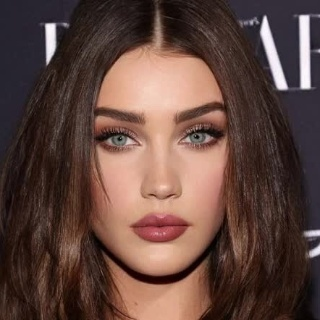
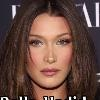

,from,to,distance
1,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000005.jpg_163_260_248_248.jpg,"[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000006.jpg_169_246_272_272.jpg, face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000001.jpg_120_281_253_254.jpg]","[0.981833, 0.975763]"
2,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000006.jpg_169_246_272_272.jpg,"[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000005.jpg_163_260_248_248.jpg, face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000001.jpg_120_281_253_254.jpg]","[0.981833, 0.972492]"
0,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000001.jpg_120_281_253_254.jpg,"[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000005.jpg_163_260_248_248.jpg, face_detection_work_dir/crops/framesdatatiktokdownload.online_1673346880144.mp4output_000006.jpg_169_246_272_272.jpg]","[0.975763, 0.972492]"
5,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673930249716.mp4output_000001.jpg_236_406_52_52.jpg,[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673930249716.mp4output_000002.jpg_234_417_51_52.jpg],[0.941177]
6,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673930249716.mp4output_000002.jpg_234_417_51_52.jpg,[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673930249716.mp4output_000001.jpg_236_406_52_52.jpg],[0.941177]
3,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673347087923.mp4output_000001.jpg_152_134_301_302.jpg,[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673347087923.mp4output_000002.jpg_144_127_316_316.jpg],[0.925375]
4,face_detection_work_dir/crops/framesdatatiktokdownload.online_1673347087923.mp4output_000002.jpg_144_127_316_316.jpg,[face_detection_work_dir/crops/framesdatatiktokdownload.online_1673347087923.mp4output_000001.jpg_152_134_301_302.jpg],[0.925375]


In [11]:
fd.vis.similarity_gallery(draw_bbox=False)

## Find Outliers

Useing the `outliers_gallery` we can also viaualize faces (detections) that looks visually different from others.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 9020.01it/s]

Stored outliers visual view in  face_detection_work_dir/galleries/outliers.html



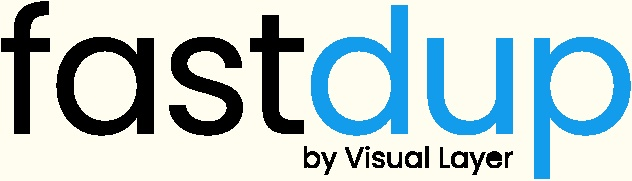
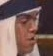
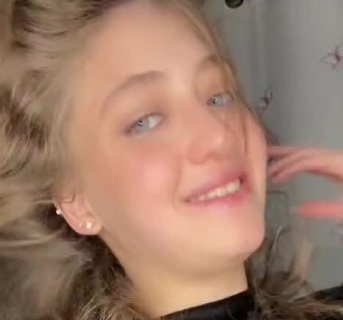

In [12]:
fd.vis.outliers_gallery()

## Duplicate Faces

With the `duplicates_gallery` view, visualize duplicate image pairs across videos.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 289.82it/s]

Stored similarity visual view in  face_detection_work_dir/galleries/duplicates.html



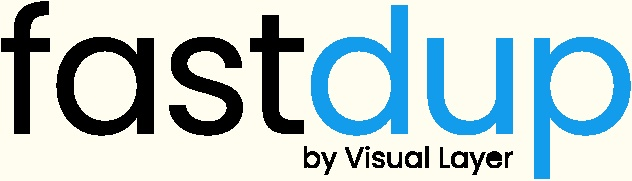
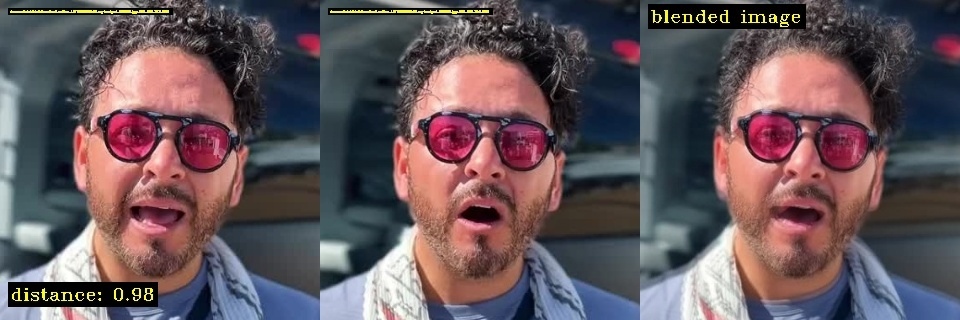
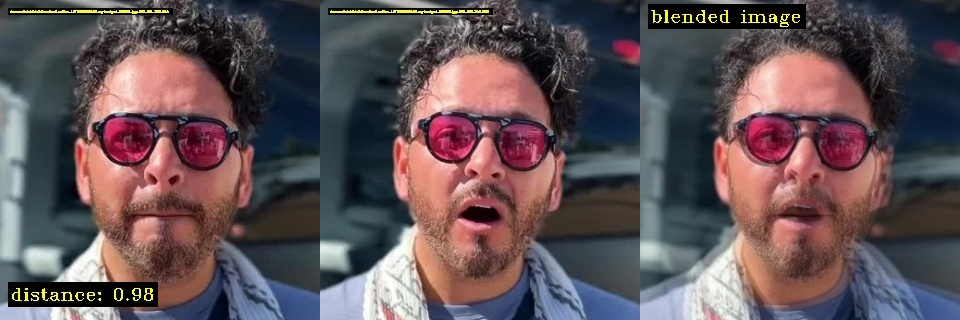
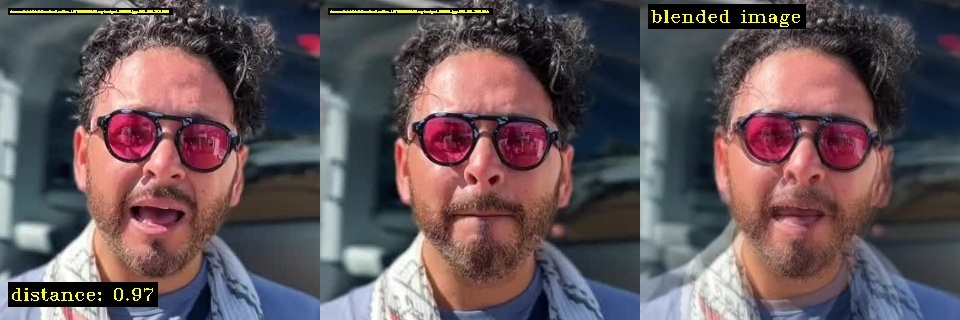
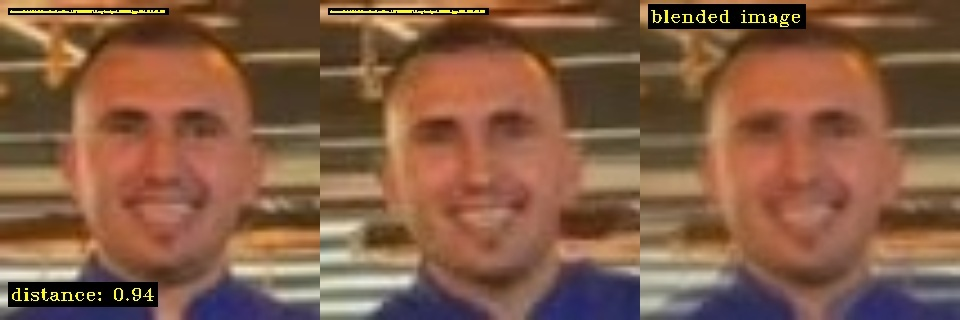
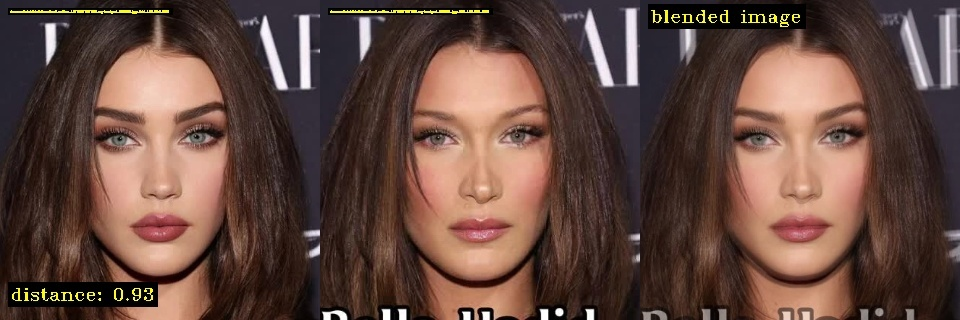

In [13]:
fd.vis.duplicates_gallery()

## Dark Faces

Using the `stats_gallery` view, we can sort the faces (detections) following a desired `metric` such as 'dark', 'bright' and 'blur'. 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 682.67it/s]

Stored mean visual view in  face_detection_work_dir/galleries/mean.html



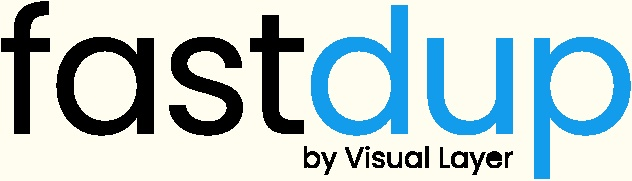
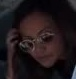
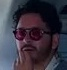
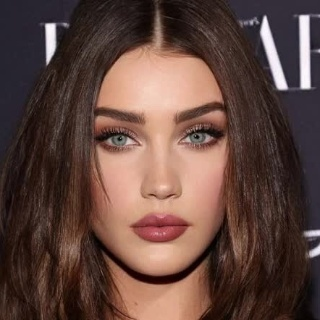
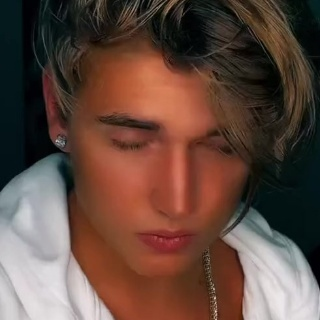
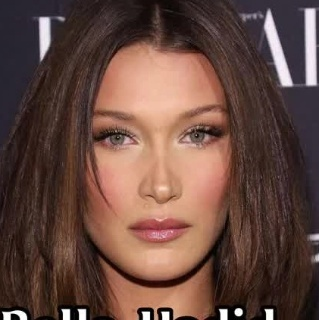
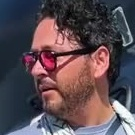
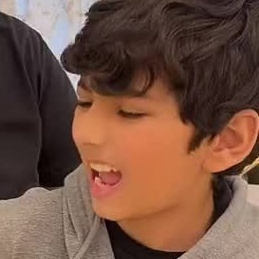
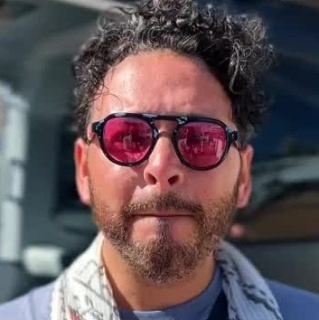
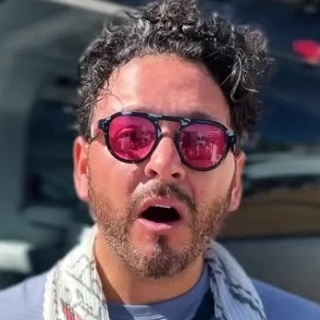
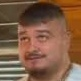
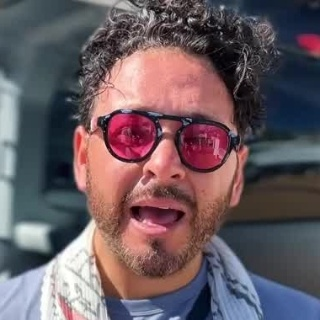
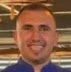
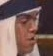
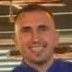
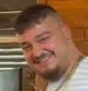
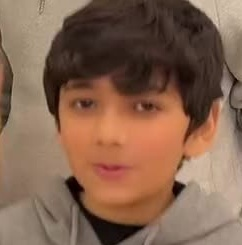
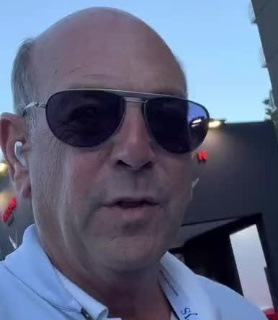
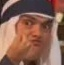
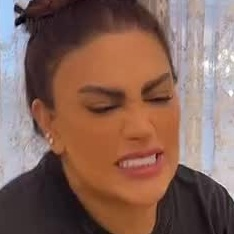
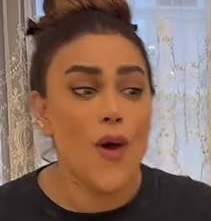

In [14]:
fd.vis.stats_gallery(metric='dark')

## Bright Faces

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 617.16it/s]


Stored mean visual view in  face_detection_work_dir/galleries/mean.html



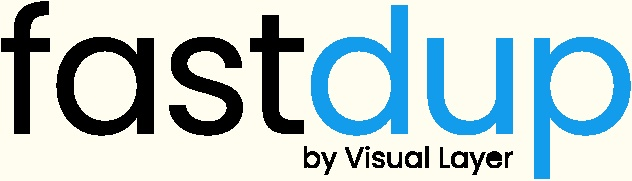
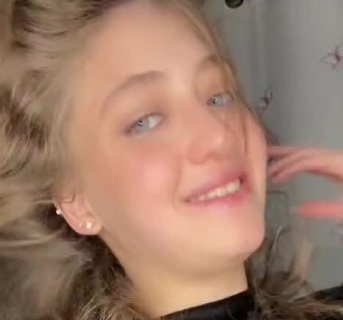
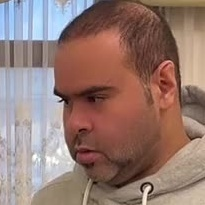
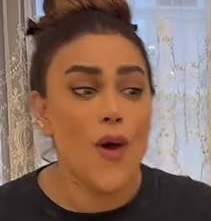
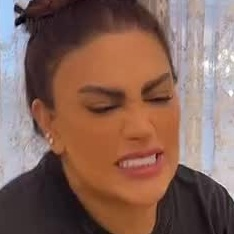
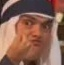
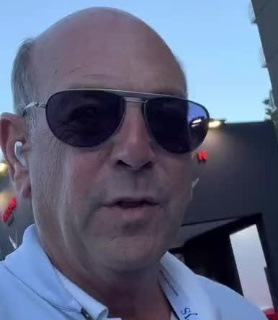
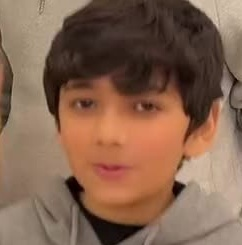
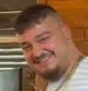
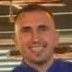
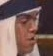
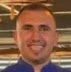
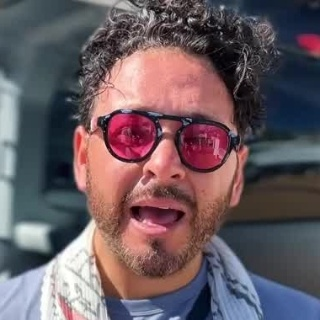
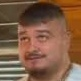
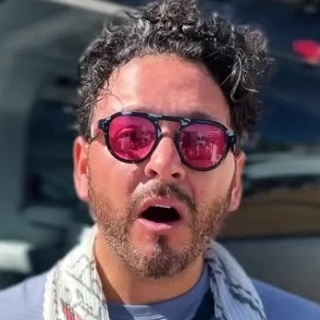
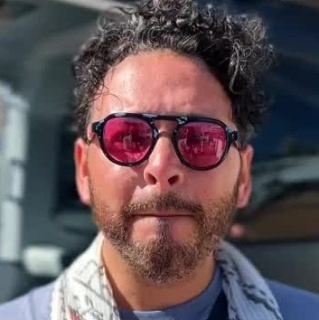
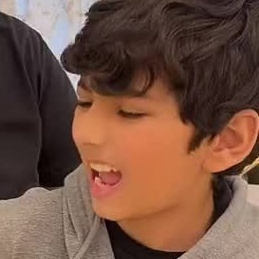
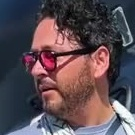
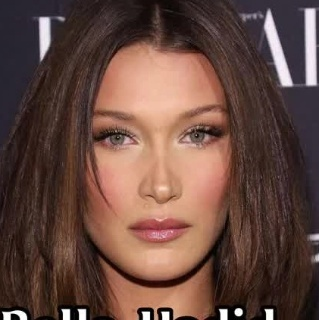
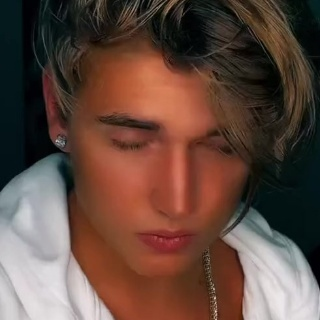
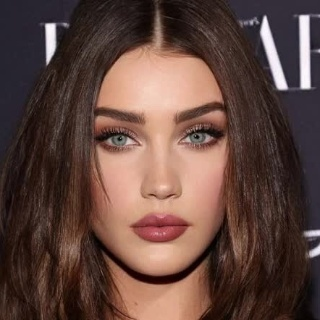

In [15]:
fd.vis.stats_gallery(metric='bright')

## Blurry Faces

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 747.09it/s]


Stored blur visual view in  face_detection_work_dir/galleries/blur.html



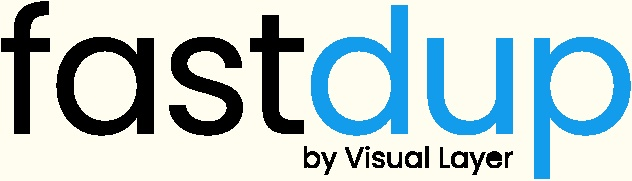
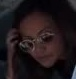
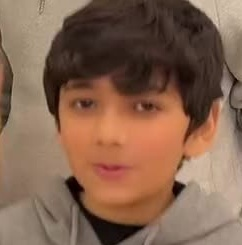
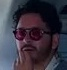
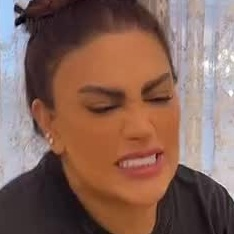
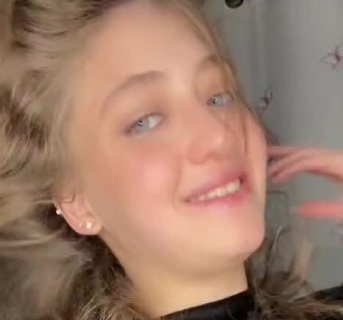
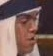
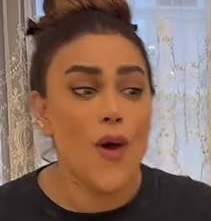
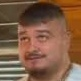
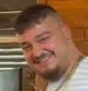
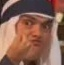
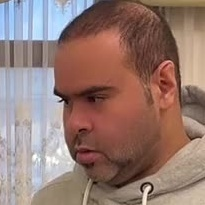
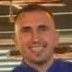
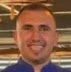
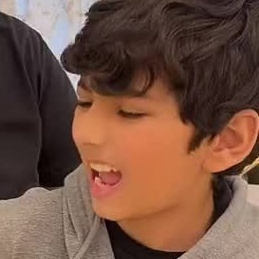
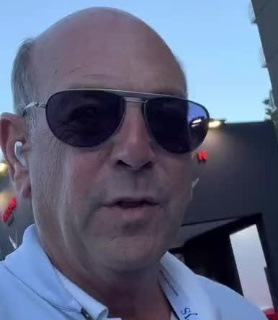
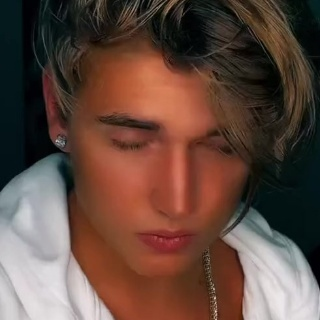
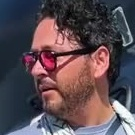
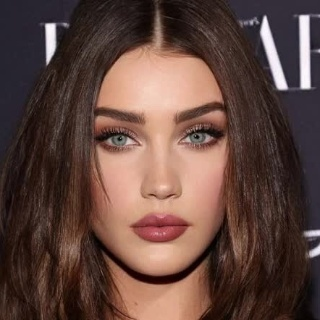
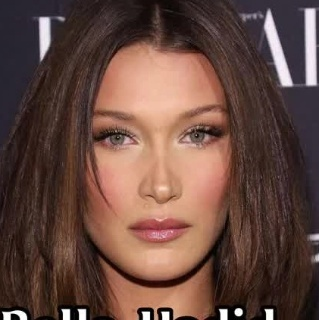
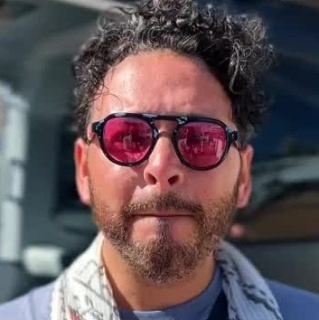

In [16]:
fd.vis.stats_gallery(metric='blur')